# Geometric Transformations of Images
---

## goals
- translation, rotation, affine transformation에 대해 배우자! 
- 사용할 함수는 cv2.getPerspectiveTransform 
---

## Transformations
- cv2.warpAffine : 인풋이 2x3 transformation matrix 
- cv2.warpPerspective : 인풋이 3x3 transformation matrix 


### scaling
- scaling이란 just resizing of the image
- cv2.resize() 
- cv2.INTER_AREA  for shrinking
- cv2.INTER_CUBIC (slow) & cv2.INTER_LINEAR for zooming
- 주로 cv2.INTER_LINEAR for all resizing purposes
- interpolation 파라미터 변경시 차이는 잘 안타나는듯 (속도의차이)

In [14]:
import cv2 
import numpy as np 

img = cv2.imread('messi5.jpg')
res = cv2.resize(img, None, fx=1, fy=1, interpolation = cv2.INTER_AREA  )

cv2.imshow('image',res)


cv2.waitKey(0)
cv2.destroyAllWindows()


In [17]:
#OR

height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

cv2.imshow('image',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Translation
- shifting of object's location 

In [21]:
import cv2 
import numpy as np 

img = cv2.imread('messi5.jpg',0)
rows,cols = img.shape 

M = np.float32([[1,0,100],[0,1,50]]) #x축 100, y축 50이동 
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Rotation
- 수식은 패스! 
- 세타만큼 회전 
- cv2.getRotationMatrix2D 

In [34]:
img = cv2.imread('messi5.jpg',0)
rows, cols = img.shape 

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Affine Transformation 


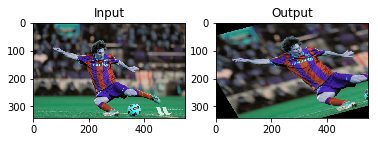

In [14]:
import cv2 
import numpy as np

img = cv2.imread('messi5.jpg',1)
rows,cols,ch = img.shape # ch?

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

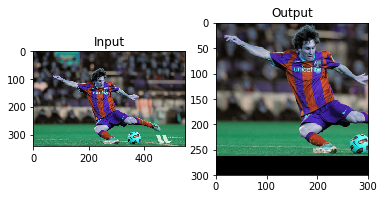

In [13]:
img = cv2.imread('messi5.jpg',1)
rows,cols,chan = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [12]:
img.shape

(342, 548, 3)